In [1]:
%load_ext autoreload
%autoreload 2
%repo_root

In [3]:
from scripts.analysis_utils import *
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
from plotly.subplots import make_subplots
import math

In [4]:
T = ToricEmbeddingAnalysis(
    run_path = "runs/T512-train-window-10-coord-weights-saveall",
    data_dir = "/cache/openwebtext/train",
    device = 'cuda' if t.cuda.is_available() else 'cpu',
)

Loaded idx2ivec (input vectors) with 50304 embeddings
Loaded idx2ovec (output vectors) with 50304 embeddings
Embedding dimension: 512
Vocab size: 50304
Created word2ivec dict with 50304 entries
Created word2ovec dict with 50304 entries
Loading model from runs/T512-train-window-10-coord-weights-saveall/sgns.pt...
Loaded coord_weights: shape=torch.Size([512]), mean=0.0279

Summary (Toric):
  Embedding dimension: 512
  Vocab size: 50304
  Coord weights available: True
  Using device: cuda


In [ ]:
T.get_closest_words('man')

KeyboardInterrupt: 

In [ ]:
v = T.word2ivec['man'] - T.word2ivec['woman'] + T.word2ivec['queen']
T.get_closest_words(v, closest_ovec=False)

[(10.107455253601074, 'queen'),
 (6.551265239715576, 'man'),
 (6.384344577789307, 'ka'),
 (6.293310165405273, 'eagle'),
 (6.188791275024414, 'kings'),
 (6.106626033782959, 'queen,'),
 (6.081460952758789, 'king'),
 (6.046052932739258, 'queens'),
 (6.038975715637207, 'emperor'),
 (5.986806392669678, 'wizard')]

In [ ]:
v = T.word2ivec['king'] + T.word2ivec['man'] - T.word2ivec['woman']
T.get_closest_words(v, closest_ovec=False, n=20)

[(10.107455253601074, 'king'),
 (6.875673294067383, 'kings'),
 (6.72578763961792, 'dragon'),
 (6.495701789855957, 'demon'),
 (6.48700475692749, 'Emperor'),
 (6.471237659454346, 'emperor'),
 (6.465265274047852, 'ruler'),
 (6.440028190612793, 'Almighty'),
 (6.402905464172363, 'Darth'),
 (6.3988237380981445, 'lord'),
 (6.392723083496094, 'monarch'),
 (6.388805389404297, 'throne'),
 (6.369513511657715, 'Satan'),
 (6.346682071685791, "king's"),
 (6.343515872955322, 'thee'),
 (6.342467784881592, 'throne.'),
 (6.340971946716309, 'Satanic'),
 (6.32468843460083, 'serpent'),
 (6.3195414543151855, 'god'),
 (6.2979536056518555, 'heaven')]

In [ ]:
v = T.word2ivec['king'] - T.word2ivec['man'] + T.word2ivec['woman']
T.get_closest_words(v, closest_ovec=False, n=20)

[(10.107454299926758, 'king'),
 (6.747434139251709, 'Emperor'),
 (6.5612592697143555, 'emperor'),
 (6.551843166351318, 'throne'),
 (6.504114627838135, 'knight'),
 (6.497673988342285, 'Loki'),
 (6.427856922149658, 'princess'),
 (6.392365455627441, 'prince'),
 (6.335948944091797, 'god'),
 (6.335493087768555, 'Augustus'),
 (6.311866283416748, 'king’s'),
 (6.301180839538574, 'royal'),
 (6.297966480255127, 'woman'),
 (6.289874076843262, 'serpent'),
 (6.2509989738464355, 'priest,'),
 (6.249814987182617, 'knights'),
 (6.249340057373047, 'Queen'),
 (6.247770309448242, 'mistress'),
 (6.245150566101074, 'goddess'),
 (6.244344711303711, 'demons')]

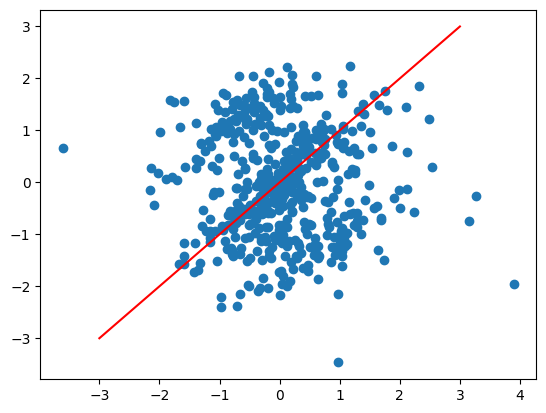

In [ ]:
# plot scatter of T.word2ivec['king'] and T.word2ovec['king']
plt.scatter(T.word2ivec['king'].cpu().numpy(), T.word2ovec['king'].cpu().numpy())
# plot y=x red line, extending entire plot
plt.plot([-3, 3], [-3, 3], 'r')
plt.show()

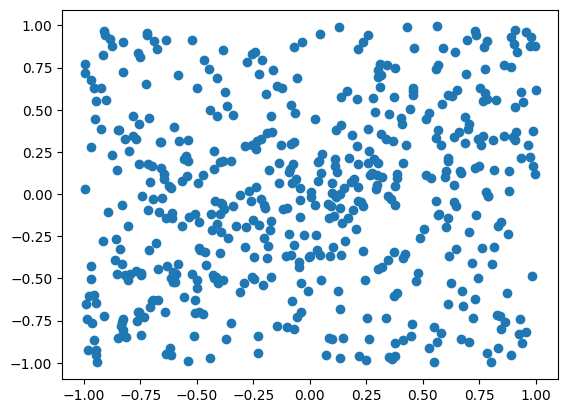

In [ ]:
q_hat = T.word2ivec['king'] + T.word2ivec['man'] - T.word2ivec['woman']
q_hat = (q_hat + 1)%2 - 1
q = T.word2ivec['queen']
q = (q + 1)%2 - 1


# scatter plot of q_hat and q
plt.scatter(q_hat.cpu().numpy(), q.cpu().numpy())
plt.show()

Stats of cos_dif
Mean: 0.7621709108352661
Std: 0.3180497884750366
Min: -0.3057905435562134
Max: 0.9999995827674866


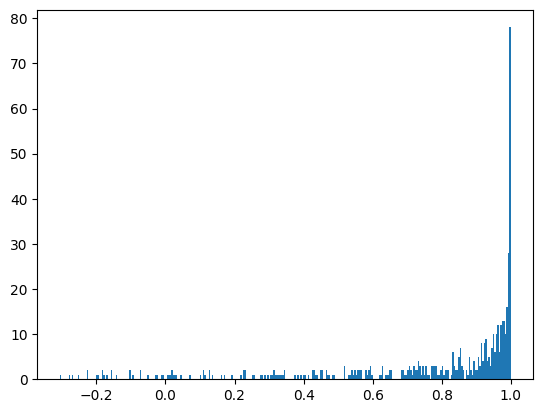

In [ ]:
cos_dif = t.cos(q_hat - q)
# stats of coordinates of cos_dif
print("Stats of cos_dif")
print(f"Mean: {cos_dif.mean()}")
print(f"Std: {cos_dif.std()}")
print(f"Min: {cos_dif.min()}")
print(f"Max: {cos_dif.max()}")
# plot histogram of cos_dif
plt.hist(cos_dif.cpu().numpy(), bins=300)
plt.show()

In [ ]:
# sort cos_dif according to T.coord_weights
cos_dif_list = cos_dif.tolist()
sorted_idx = sorted(range(len(cos_dif_list)), key=lambda x: T.coord_weights[x], reverse=True)
sorted_cos_dif = [cos_dif_list[i] for i in sorted_idx]
sorted_coord_weights = [T.coord_weights[i].item() for i in sorted_idx]  # .item() converts tensor to Python scalar

# Create interactive plotly plot
fig = go.Figure()
fig.add_trace(go.Scatter(
    y=sorted_cos_dif,
    mode='lines',
    name='cos_dif',
    line=dict(color='blue')
))
fig.add_trace(go.Scatter(
    y=sorted_coord_weights,
    mode='lines',
    name='coord_weights',
    line=dict(color='red')
))
fig.update_layout(
    title='Sorted cos_dif and coord_weights',
    xaxis_title='Index (sorted by coord_weights)',
    yaxis_title='Value',
    hovermode='x unified'
)
fig.show()

In [ ]:
print(sorted_coord_weights[:10])

[1.692670464515686, 0.7615638375282288, 0.6661352515220642, 0.44803187251091003, 0.3142378032207489, 0.2959553897380829, 0.2385004460811615, 0.06681756675243378, 0.06482201814651489, 0.06375222653150558]


In [ ]:
print(sorted_cos_dif[:10])

[0.9739828705787659, 0.9999725818634033, 0.9966606497764587, 0.9991438388824463, 0.9886893033981323, 0.9996830224990845, 0.9756518006324768, 0.73049396276474, 0.46754926443099976, 0.9993831515312195]


In [ ]:
print(T.similarity(q, q_hat))
print(T.similarity(q_hat, q))

tensor(5.4374, device='cuda:0', grad_fn=<SumBackward1>)
tensor(5.4374, device='cuda:0', grad_fn=<SumBackward1>)


In [ ]:
print(T.similarity(0, 1))
print(T.similarity(1, 0)) # should not be equal in general

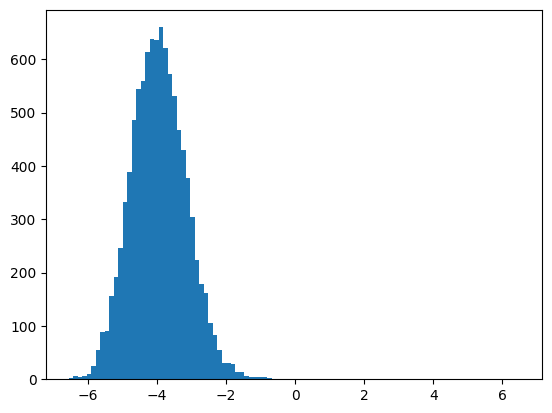

In [ ]:
# histogram of T.similarity(q, c) for c in words
similarities = [T.similarity(q, c).item() for c in range(10000)]
plt.hist(similarities)
plt.show()

[0.9988006949424744, 0.9676229953765869, 0.5945486426353455, -0.6512706875801086, 0.9685122966766357, 0.18628039956092834, 0.488008975982666, 0.19285179674625397, 0.39230647683143616, 0.9146928191184998, 0.18930362164974213, 0.31058257818222046, 0.9989643096923828, -0.6201303005218506, 0.47032564878463745, 0.9814476370811462, 0.556935727596283, 0.3386556804180145, 0.5144371390342712, 0.5193189978599548, 0.943533182144165, 0.79827481508255, 0.97061687707901, 0.9850246906280518, 0.5466625094413757, 0.7856190800666809, -0.34514111280441284, 0.6279506683349609, 0.9806913733482361, 0.24335245788097382, 0.6674977540969849, -0.10273659974336624, 0.9283388257026672, 0.7595900297164917, 0.7722116708755493, 0.854161262512207, 0.9421067833900452, 0.007380970753729343, 0.7702103853225708, 0.9109278917312622, -0.0739951804280281, -0.23032709956169128, -0.4505815804004669, 0.9808482527732849, 0.40817829966545105, 0.9670984148979187, 0.8216704726219177, 0.9266691207885742, -0.6048855185508728, 0.4632

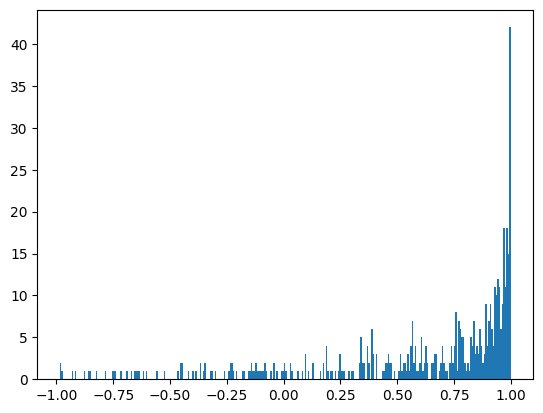

In [ ]:
# histogram of cos(random vector)
random_vector = t.randn(T.e_dim)
rand_cos_dif = t.cos(random_vector)
plt.hist(rand_cos_dif.cpu().numpy(), bins=300)
# plt.show()

# sort cos_dif
rand_cos_dif_list = rand_cos_dif.tolist()
print(rand_cos_dif_list)
rand_cos_dif_list = sorted(rand_cos_dif_list, reverse=True)
print(rand_cos_dif_list)

In [ ]:
rand_cos_dif_list[:10]

[0.9999874830245972,
 0.9999757409095764,
 0.9999702572822571,
 0.9999619722366333,
 0.9999212622642517,
 0.9998080730438232,
 0.9997249245643616,
 0.999711275100708,
 0.9996902346611023,
 0.9996762275695801]

Real embedding analysis

In [22]:
R = RealEmbeddingAnalysis(
    run_path = "runs/R512-train-window-10-saveall",
    data_dir = "/cache/openwebtext/train",
    device = 'cuda'
)

Loaded idx2ivec (input vectors) with 50304 embeddings
Loaded idx2ovec (output vectors) with 50304 embeddings
Embedding dimension: 512
Vocab size: 50304
Created word2ivec dict with 50304 entries
Created word2ovec dict with 50304 entries

Summary (Real):
  Embedding dimension: 512
  Vocab size: 50304
  Using device: cuda


In [ ]:
R.get_closest_words('man') # dot product

[(0.898068904876709, 'bearded'),
 (0.2119441032409668, 'wielding'),
 (0.14567750692367554, 'fatally'),
 (0.0894058346748352, '21-year-old'),
 (0.03446313738822937, 'injured'),
 (0.0, '<UNK>'),
 (-0.15826523303985596, '28-year-old'),
 (-0.20504015684127808, '32-year-old'),
 (-0.269547700881958, 'woman'),
 (-0.31257230043411255, 'stabbed')]

In [ ]:
R.get_closest_words('man') # closest by cosine

[(0.03690909594297409, 'bearded'),
 (0.008888731710612774, 'wielding'),
 (0.006212581414729357, 'fatally'),
 (0.004215872380882502, '21-year-old'),
 (0.0019021346233785152, 'injured'),
 (0.0, '<UNK>'),
 (-0.007014274597167969, '28-year-old'),
 (-0.00870887003839016, '32-year-old'),
 (-0.01390024833381176, 'stabbed'),
 (-0.01619614288210869, 'beheaded')]

In [27]:
v = R.word2ivec['king'] + R.word2ivec['woman'] - R.word2ivec['man']
R.get_closest_words(v)

[(0.06959157437086105, "king's"),
 (0.0573420412838459, 'anointed'),
 (0.04481876268982887, 'groom'),
 (0.042961087077856064, 'king.'),
 (0.04263204336166382, 'palace,'),
 (0.0419425442814827, 'queen,'),
 (0.040624912828207016, 'heir'),
 (0.0317259281873703, 'daughters'),
 (0.03152082487940788, 'Empress'),
 (0.03114413470029831, 'throne')]

In [16]:
# Plot first dimension of king, queen, man, woman on a circle (toric space [-1, 1])
# Get first dimension values (convert to CPU and numpy)

dim = 486
words = ['king', 'queen', 'man', 'woman']
values = {}
for word in words:
    # Use T (toric) or r (real) - change as needed
    vec = T.word2ivec[word] if word in T.word2ivec else r.word2ivec[word]
    values[word] = vec[dim].item()  # first dimension

# Map values from [-1, 1] to angles [0, 2π]
# In toric space, -1 = 1, so we map: angle = π * (value + 1)
angles = {word: np.pi * val for word, val in values.items()}

# Convert to x, y coordinates on unit circle
x_coords = {word: np.cos(angle) for word, angle in angles.items()}
y_coords = {word: np.sin(angle) for word, angle in angles.items()}

# Create plotly figure
fig = go.Figure()

# Draw the circle outline
theta_circle = np.linspace(0, 2*np.pi, 100)
x_circle = np.cos(theta_circle)
y_circle = np.sin(theta_circle)
fig.add_trace(go.Scatter(
    x=x_circle, y=y_circle,
    mode='lines',
    line=dict(color='gray', width=1, dash='dash'),
    name='Unit Circle',
    showlegend=False
))

# Plot each word
colors = {'king': 'red', 'queen': 'purple', 'man': 'blue', 'woman': 'pink'}
for word in words:
    fig.add_trace(go.Scatter(
        x=[x_coords[word]], y=[y_coords[word]],
        mode='markers+text',
        marker=dict(size=8, color=colors[word]),
        text=[word],
        textposition='middle right',
        name=word,
        hovertemplate=f'{word}<br>Value: {values[word]:.4f}<br>Angle: {angles[word]:.4f}<extra></extra>'
    ))

# Add axis lines through origin
fig.add_trace(go.Scatter(
    x=[-1.2, 1.2], y=[0, 0],
    mode='lines',
    line=dict(color='lightgray', width=1),
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=[0, 0], y=[-1.2, 1.2],
    mode='lines',
    line=dict(color='lightgray', width=1),
    showlegend=False
))

# Draw arrows: man->woman and king->queen
def add_arrow(fig, x0, y0, x1, y1, color):
    # Draw line
    fig.add_trace(go.Scatter(
        x=[x0, x1], y=[y0, y1],
        mode='lines',
        line=dict(color=color, width=1.5),
        showlegend=False,
        hoverinfo='skip'
    ))
    # Arrowhead
    angle = np.arctan2(y1 - y0, x1 - x0)
    arrow_size = 0.06
    arrow_x = [x1, x1 - arrow_size * np.cos(angle - np.pi/6), 
               x1 - arrow_size * np.cos(angle + np.pi/6), x1]
    arrow_y = [y1, y1 - arrow_size * np.sin(angle - np.pi/6),
               y1 - arrow_size * np.sin(angle + np.pi/6), y1]
    fig.add_trace(go.Scatter(
        x=arrow_x, y=arrow_y,
        mode='lines',
        fill='toself',
        fillcolor=color,
        line=dict(color=color, width=0),
        showlegend=False,
        hoverinfo='skip'
    ))

# man -> woman (blue)
add_arrow(fig, x_coords['man'], y_coords['man'], x_coords['woman'], y_coords['woman'], 'blue')
# king -> queen (red)
add_arrow(fig, x_coords['king'], y_coords['king'], x_coords['queen'], y_coords['queen'], 'red')

# Update layout
fig.update_layout(
    title='First Dimension on Toric Circle ([-1, 1] wraps)',
    xaxis=dict(range=[-1.3, 1.3], scaleanchor='y', scaleratio=1),
    yaxis=dict(range=[-1.3, 1.3]),
    width=600,
    height=600,
    showlegend=True
)

fig.show()

# Print values for reference
print("Heaviest dimension values:")
for word in words:
    print(f"  {word:6}: {values[word]:8.4f} → angle: {angles[word]:6.4f} rad ({np.degrees(angles[word]):6.1f}°)")


Heaviest dimension values:
  king  :   0.0429 → angle: 0.1347 rad (   7.7°)
  queen :  -0.1424 → angle: -0.4474 rad ( -25.6°)
  man   :   0.0197 → angle: 0.0618 rad (   3.5°)
  woman :  -0.0236 → angle: -0.0743 rad (  -4.3°)


In [12]:
# Plot top k dimensions (by coord_weights) in a square grid

# Choose k as a perfect square (e.g., 9 = 3x3, 16 = 4x4, 25 = 5x5)
k = 4
grid_size = int(math.sqrt(k))

# Get top k dimensions sorted by coord_weights
coord_weights_cpu = T.coord_weights.detach().cpu().numpy()
top_k_indices = np.argsort(coord_weights_cpu)[-k:][::-1]  # descending order

words = ['king', 'queen', 'man', 'woman']
colors = {'king': 'red', 'queen': 'purple', 'man': 'blue', 'woman': 'pink'}

# Create subplots with shorter titles (dimension index and weight)
fig = make_subplots(
    rows=grid_size, cols=grid_size,
    subplot_titles=[f'{idx}:{coord_weights_cpu[idx]:.3f}' for idx in top_k_indices],  # Dim:weight format
    specs=[[{'type': 'scatter'} for _ in range(grid_size)] for _ in range(grid_size)],
    horizontal_spacing=0.05,
    vertical_spacing=0.08
)

# For each top dimension
for plot_idx, dim_idx in enumerate(top_k_indices):
    row = plot_idx // grid_size + 1
    col = plot_idx % grid_size + 1
    
    # Get values for this dimension
    values = {}
    for word in words:
        vec = T.word2ivec[word] if word in T.word2ivec else r.word2ivec[word]
        values[word] = vec[dim_idx].item()
    
    # Map to angles: angle = π * (value + 1)
    angles = {word: np.pi * val for word, val in values.items()}
    x_coords = {word: np.cos(angle) for word, angle in angles.items()}
    y_coords = {word: np.sin(angle) for word, angle in angles.items()}
    
    # Draw circle outline
    theta_circle = np.linspace(0, 2*np.pi, 50)
    x_circle = np.cos(theta_circle)
    y_circle = np.sin(theta_circle)
    fig.add_trace(
        go.Scatter(x=x_circle, y=y_circle, mode='lines',
                  line=dict(color='lightgray', width=0.5), showlegend=False),
        row=row, col=col
    )
    
    # Plot each word
    for word in words:
        fig.add_trace(
            go.Scatter(
                x=[x_coords[word]], y=[y_coords[word]],
                mode='markers+text',
                marker=dict(size=5, color=colors[word]),  # Smaller markers
                text=[word[0]],  # Just first letter to save space
                textposition='middle right',
                textfont=dict(size=8),  # Smaller text
                name=word if plot_idx == 0 else '',  # Only show legend for first subplot
                showlegend=(plot_idx == 0),
                hovertemplate=f'{word}<br>Dim {dim_idx}<br>Value: {values[word]:.4f}<extra></extra>'
            ),
            row=row, col=col
        )
    
    # Draw vectors: man->woman and king->queen as lines with arrowheads
    # Calculate arrow direction for proper arrowhead placement
    def add_arrow(fig, x0, y0, x1, y1, color, row, col):
        # Draw line (thinner)
        fig.add_trace(
            go.Scatter(
                x=[x0, x1], y=[y0, y1],
                mode='lines',
                line=dict(color=color, width=1),  # Thinner line
                showlegend=False,
                hoverinfo='skip'
            ),
            row=row, col=col
        )
        # Add arrowhead as a small triangle at the end (smaller)
        # Calculate angle
        angle = np.arctan2(y1 - y0, x1 - x0)
        arrow_size = 0.04  # Smaller arrowhead
        # Arrowhead triangle points
        arrow_x = [x1, x1 - arrow_size * np.cos(angle - np.pi/6), 
                   x1 - arrow_size * np.cos(angle + np.pi/6), x1]
        arrow_y = [y1, y1 - arrow_size * np.sin(angle - np.pi/6),
                   y1 - arrow_size * np.sin(angle + np.pi/6), y1]
        fig.add_trace(
            go.Scatter(
                x=arrow_x, y=arrow_y,
                mode='lines',
                fill='toself',
                fillcolor=color,
                line=dict(color=color, width=0),
                showlegend=False,
                hoverinfo='skip'
            ),
            row=row, col=col
        )
    
    # man -> woman (blue)
    add_arrow(fig, x_coords['man'], y_coords['man'], 
              x_coords['woman'], y_coords['woman'], 'blue', row, col)
    # king -> queen (red)
    add_arrow(fig, x_coords['king'], y_coords['king'],
              x_coords['queen'], y_coords['queen'], 'red', row, col)

# Update layout
fig.update_layout(
    title=f'Top {k} Dimensions (by coord_weights) - Circular Plots',
    height=900,
    width=900,
    showlegend=True,
    title_font_size=14
)

# Set ranges and fix aspect ratio for all subplots (make circles circular!)
# For plotly subplots, match y-axis to x-axis with scaleanchor='x' and scaleratio=1
for row in range(1, grid_size + 1):
    for col in range(1, grid_size + 1):
        fig.update_xaxes(
            range=[-1.2, 1.2], 
            row=row, col=col,
            title_font_size=8,
            tickfont_size=7
        )
        # Scale y-axis to match x-axis for square aspect ratio (circular circles!)
        fig.update_yaxes(
            range=[-1.2, 1.2], 
            row=row, col=col,
            scaleanchor='x',  # Reference the x-axis of the same subplot
            scaleratio=1,     # 1:1 aspect ratio
            title_font_size=8,
            tickfont_size=7
        )

# Update subplot title font size
for annotation in fig.layout.annotations:
    annotation.font.size = 9

fig.show()

print(f"Top {k} dimensions (sorted by coord_weights):")
for i, dim_idx in enumerate(top_k_indices):
    print(f"  {i+1:2d}. Dim {dim_idx:3d}: weight = {coord_weights_cpu[dim_idx]:.6f}")


Top 4 dimensions (sorted by coord_weights):
   1. Dim 486: weight = 1.692670
   2. Dim 263: weight = 0.761564
   3. Dim 230: weight = 0.666135
   4. Dim 355: weight = 0.448032


In [20]:
wc_path = os.path.join(T.data_dir, 'wc.dat')
wc = pickle.load(open(wc_path, 'rb'))

In [21]:
for word in ["king", "queen", "man", "woman"]:
    print(f"{word}: {wc[word]}")

king: 102044
queen: 37503
man: 1814550
woman: 884347


More analogies

In [8]:
# Create a TSV file of 4-tuples for analogies: a,b,c,d per line
tuples = [
    # capitals
    ("paris", "france", "berlin", "germany"),
    ("rome", "italy", "madrid", "spain"),
    ("ottawa", "canada", "tokyo", "japan"),
    ("beijing", "china", "moscow", "russia"),
    ("athens", "greece", "lisbon", "portugal"),
    # countries -> nationality/language
    ("japan", "japanese", "germany", "german"),
    ("spain", "spanish", "italy", "italian"),
    ("france", "french", "china", "chinese"),
    ("russia", "russian", "canada", "canadian"),
    # singular ↔ plural
    ("car", "cars", "book", "books"),
    ("dog", "dogs", "cat", "cats"),
    ("child", "children", "person", "people"),
    ("mouse", "mice", "goose", "geese"),
    # present ↔ past
    ("run", "ran", "swim", "swam"),
    ("go", "went", "come", "came"),
    ("eat", "ate", "write", "wrote"),
    ("walk", "walked", "play", "played"),
    # base ↔ -ing
    ("run", "running", "swim", "swimming"),
    ("read", "reading", "write", "writing"),
    ("dance", "dancing", "sing", "singing"),
    # base ↔ 3rd person -s
    ("run", "runs", "swim", "swims"),
    ("write", "writes", "read", "reads"),
    ("play", "plays", "sing", "sings"),
    # positive ↔ comparative
    ("big", "bigger", "small", "smaller"),
    ("fast", "faster", "slow", "slower"),
    ("tall", "taller", "short", "shorter"),
    # positive ↔ superlative
    ("good", "best", "bad", "worst"),
    ("high", "highest", "low", "lowest"),
    # antonym-ish
    ("hot", "cold", "day", "night"),
    ("happy", "sad", "rich", "poor"),
    # job ↔ place/tool
    ("doctor", "hospital", "teacher", "school"),
    ("painter", "brush", "writer", "pen"),
]

path = "/home/claire/pytorch-sgns/data/analogies_4tuples.txt"

with open(path, "w", encoding="utf-8") as f:
    for a,b,c,d in tuples:
        f.write(f"{a}\t{b}\t{c}\t{d}\n")

print("Saved", path)
print("First 5 lines preview:")
with open(path, "r", encoding="utf-8") as f:
    for _ in range(5):
        print(f.readline().rstrip())


Saved /home/claire/pytorch-sgns/data/analogies_4tuples.txt
First 5 lines preview:
paris	france	berlin	germany
rome	italy	madrid	spain
ottawa	canada	tokyo	japan
beijing	china	moscow	russia
athens	greece	lisbon	portugal


In [5]:
tuples = []
with open("/home/claire/pytorch-sgns/data/analogies_4tuples.txt", "r", encoding="utf-8") as f:
    for line in f:
        a, b, c, d = line.strip().split("\t")
        tuples.append((a, b, c, d))

In [ ]:
# evaluate: vec(b) - vec(a) + vec(c) ≈ vec(d)
for a, b, c, d in tuples:
    if all(w in r.word2ivec for w in (a, b, c, d)):
        v = r.word2ivec[b] - r.word2ivec[a] + r.word2ivec[c]
        print(f"{a}:{b} :: {c}:? (expect {d})")
        print(r.get_closest_words(v, closest_ovec=False)[:10], "\n")


car:cars :: book:? (expect books)
[(17.178855895996094, 'Merit:'), (17.010961532592773, '$13.99/month'), (16.814407348632812, '27¢'), (16.30192756652832, 'PT...'), (16.089263916015625, '[Permalink]'), (15.646236419677734, '*Introductory'), (15.564916610717773, '$0.99/month'), (15.341169357299805, 'Travels'), (14.178290367126465, 'window._taboola'), (14.024385452270508, 'cume:')] 

dog:dogs :: cat:? (expect cats)
[(20.85101318359375, 'PT...'), (20.396141052246094, 'cat'), (19.068401336669922, '$this'), (18.714157104492188, 'dogs'), (17.683622360229492, 'SCROLL'), (16.946874618530273, '$16.99/month'), (16.597288131713867, '$13.99/month'), (16.191387176513672, 'Delivery:'), (15.681384086608887, '$10.99/month'), (15.57467269897461, 'main()')] 

child:children :: person:? (expect people)
[(15.387409210205078, 'tag.Click'), (14.794111251831055, 'subscribe,'), (14.117081642150879, '$16.99/month'), (12.93769645690918, "'Damn"), (12.913923263549805, 'PT...'), (12.835147857666016, '[Permalink]')

KeyboardInterrupt: 

In [25]:
# evaluate: vec(b) - vec(a) + vec(c) ≈ vec(d)
for a, b, c, d in tuples:
    if all(w in T.word2ivec for w in (a, b, c, d)):
        v = T.word2ivec[c] - (T.word2ivec[b] - T.word2ivec[a])
        print(f"{a}:{b} :: {c}:? (expect {d})")
        print(T.get_closest_words(v, closest_ovec=False), "\n")

car:cars :: book:? (expect books)
[(9.42052936553955, 'book'), (7.6634368896484375, 'book,'), (6.794430255889893, 'autobiography'), (6.725048542022705, 'Book'), (6.618358135223389, 'novel'), (6.528951644897461, 'biography'), (6.490726470947266, 'autobiography,'), (6.365331649780273, 'self-published'), (6.355529308319092, 'novels'), (6.306032180786133, 'essay,')] 

dog:dogs :: cat:? (expect cats)
[(9.779640197753906, 'cat'), (7.847141265869141, 'dog'), (6.45948600769043, 'kitten'), (6.368839263916016, 'animal.'), (6.335902214050293, 'cats'), (6.091123580932617, 'prehistoric'), (6.082406997680664, 'monkeys'), (6.071951389312744, 'rat'), (6.049495697021484, 'Hello'), (6.046597480773926, 'cat,')] 

child:children :: person:? (expect people)
[(8.376705169677734, 'person'), (6.299419403076172, 'person.'), (6.285759449005127, 'person,'), (5.905335426330566, 'Summary:'), (5.807958602905273, 'persons'), (5.797363758087158, 'child,'), (5.7598161697387695, 'participants'), (5.755136013031006, '<U

In [9]:
# evaluate: vec(b) - vec(a) + vec(c) ≈ vec(d)
for a, b, c, d in tuples:
    if all(w in T.word2ivec for w in (a, b, c, d)):
        v = T.steer_torus_point(T.word2ivec[c], T.word2ivec[a], T.word2ivec[b]) # c + (b-a)
        print(f"{T.word2ivec[c][0].item()}+ ({T.word2ivec[b][0].item()}-{T.word2ivec[a][0].item()}) = {v[0].item()}")
        print(f"{a}:{b} :: {c}:? (expect {d})")
        print(T.get_closest_words(v, closest_ovec=False), "\n")

0.03314812853932381+ (-0.2178572565317154--0.08088269084692001) = -0.33188799023628235
car:cars :: book:? (expect books)


[(5.79511833190918, 'composers'), (5.756105422973633, 'poets'), (5.724025726318359, 'opinions,'), (5.721542835235596, 'enhancement'), (5.696393966674805, 'reluctance'), (5.695845127105713, 'ideas'), (5.662191867828369, 'music?'), (5.651108264923096, 'radio,'), (5.615283012390137, 'briefings'), (5.602138996124268, 'oral')] 

-0.6798333525657654+ (1.5089380741119385--0.28190767765045166) = -0.09313619136810303
dog:dogs :: cat:? (expect cats)
[(8.678047180175781, 'dogs'), (7.847142219543457, 'dog'), (6.278690338134766, 'livestock'), (6.147087574005127, 'bulls'), (6.03886604309082, 'dog,'), (6.033184051513672, 'pet'), (6.026904582977295, 'birds'), (6.026716232299805, 'animals'), (6.018431663513184, 'elk'), (6.010151386260986, 'birds,')] 

0.4588179588317871+ (-0.39309415221214294-1.4816768169403076) = 0.6297647356987
child:children :: person:? (expect people)
[(5.960478782653809, 'children'), (5.68916654586792, 'orphans'), (5.688205242156982, 'kids'), (5.601506233215332, 'everyday'), (5.58

In [ ]:
# evaluate: vec(b) - vec(a) + vec(c) ≈ vec(d)
for a, b, c, d in [("man", "woman", "king", "queen")]:
    v = T.steer_torus_point(T.word2ivec[c], T.word2ivec[a], T.word2ivec[b]) # c + (b-a)
    print(f"{T.word2ivec[c][0].item()}+ ({T.word2ivec[b][0].item()}-{T.word2ivec[a][0].item()}) = {v[0].item()}")
    print(f"{a}:{b} :: {c}:? (expect {d})")
    print(T.get_closest_words(v, closest_ovec=False), "\n")

1.2624200582504272+ (0.10006345063447952-0.14190420508384705) = 0.9795476794242859
man:woman :: king:? (expect queen)
[(6.3277082443237305, 'forgets'), (6.297966003417969, 'woman'), (6.1541595458984375, 'Dawn,'), (5.822719097137451, 'Nic'), (5.743305206298828, 'translated'), (5.679027557373047, 'sufficient.'), (5.676717758178711, 'Marvel’s'), (5.652492523193359, 'person'), (5.645150184631348, 'man'), (5.64284086227417, "man's")] 



In [19]:
# evaluate: vec(b) - vec(a) + vec(c) ≈ vec(d)
for a, b, c, d in [("man", "woman", "king", "queen")]:
    v = T.word2ivec[c] + T.word2ivec[a] - T.word2ivec[b]
    print(f"{a}:{b} :: {c}:? (expect {d})")
    print(T.get_closest_words(v, closest_ovec=False), "\n")

man:woman :: king:? (expect queen)
[(10.107455253601074, 'king'), (6.875673294067383, 'kings'), (6.72578763961792, 'dragon'), (6.495701789855957, 'demon'), (6.48700475692749, 'Emperor'), (6.471237659454346, 'emperor'), (6.465265274047852, 'ruler'), (6.440028190612793, 'Almighty'), (6.402905464172363, 'Darth'), (6.3988237380981445, 'lord')] 



In [20]:
# evaluate: vec(b) - vec(a) + vec(c) ≈ vec(d)
for a, b, c, d in [("man", "woman", "king", "queen")]:
    v = T.word2ivec[c] - T.word2ivec[a] + T.word2ivec[b]
    print(f"{a}:{b} :: {c}:? (expect {d})")
    print(T.get_closest_words(v, closest_ovec=False), "\n")

man:woman :: king:? (expect queen)
[(10.107454299926758, 'king'), (6.747434139251709, 'Emperor'), (6.5612592697143555, 'emperor'), (6.551843166351318, 'throne'), (6.504114627838135, 'knight'), (6.497673988342285, 'Loki'), (6.427856922149658, 'princess'), (6.392365455627441, 'prince'), (6.335948944091797, 'god'), (6.335493087768555, 'Augustus')] 



Look at Google word2vec embeddings

In [2]:
import gensim.downloader as api

# Pick ONE of these canonical models:
NAME = "word2vec-google-news-300"   # ~1.6GB, classic GoogleNews
# NAME = "glove-wiki-gigaword-300"  # ~376MB, Stanford GloVe (Wiki+Gigaword)
# NAME = "fasttext-wiki-news-subwords-300"  # ~1.1GB, fastText (WikiNews, subwords)

print(f"Loading {NAME} ... (first time will download & cache)")
wv = api.load(NAME)  # returns KeyedVectors

Loading word2vec-google-news-300 ... (first time will download & cache)
[==================================================] 100.0% 1662.8/1662.8MB downloaded
dim: 300
king [ 0.12597656  0.02978516  0.00860596  0.13964844 -0.02563477]
queen [ 0.00524902 -0.14355469 -0.06933594  0.12353516  0.13183594]
apple [-0.06445312 -0.16015625 -0.01208496  0.13476562 -0.22949219]
python [ 0.27734375  0.12402344 -0.40820312  0.15722656 -0.19726562]

Analogy king - man + woman ≈ [('queen', 0.7118193507194519), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321839332581)]

Nearest to 'computer': [('computers', 0.7979379892349243), ('laptop', 0.6640493273735046), ('laptop_computer', 0.6548868417739868), ('Computer', 0.647333562374115), ('com_puter', 0.6082080006599426)]
Similarity('cat','dog') = 0.76094574


In [3]:
# quick sanity checks
print("dim:", wv.vector_size)
for word in ["king", "queen", "apple", "python"]:
    if word in wv:
        print(word, wv[word][:5])  # first 5 dims

# simple queries
if all(w in wv for w in ["king","man","queen","woman"]):
    print("\nAnalogy king - man + woman ≈", wv.most_similar(positive=["king","woman"], negative=["man"], topn=5))

print("\nNearest to 'computer':", wv.most_similar("computer", topn=5))
print("Similarity('cat','dog') =", wv.similarity("cat","dog"))

dim: 300
king [ 0.12597656  0.02978516  0.00860596  0.13964844 -0.02563477]
queen [ 0.00524902 -0.14355469 -0.06933594  0.12353516  0.13183594]
apple [-0.06445312 -0.16015625 -0.01208496  0.13476562 -0.22949219]
python [ 0.27734375  0.12402344 -0.40820312  0.15722656 -0.19726562]

Analogy king - man + woman ≈ [('queen', 0.7118193507194519), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321839332581)]

Nearest to 'computer': [('computers', 0.7979379892349243), ('laptop', 0.6640493273735046), ('laptop_computer', 0.6548868417739868), ('Computer', 0.647333562374115), ('com_puter', 0.6082080006599426)]
Similarity('cat','dog') = 0.76094574


In [4]:
def in_vocab(w):
    # gensim >=4: w in wv.key_to_index; also supports "w in wv"
    return (w in getattr(wv, "key_to_index", {})) or (w in wv)

def vec(w): 
    return wv[w]

def most_similar_vec(v, topn=10, exclude=None):
    # use built-in search by vector
    cand = wv.similar_by_vector(v, topn=topn + (len(exclude) if exclude else 0))
    if exclude:
        cand = [(w, s) for (w, s) in cand if w not in exclude]
    return cand[:topn]

In [7]:
# 2) evaluate: vec(b) - vec(a) + vec(c) ≈ vec(d)
for a, b, c, d in tuples:
    if all(in_vocab(w) for w in (a, b, c, d)):
        v = vec(b) - vec(a) + vec(c)
        res = most_similar_vec(v, topn=10, exclude={a, b, c})  # exclude source words
        print(f"{a}:{b} :: {c}:? (expect {d})")
        print(res, "\n")

paris:france :: berlin:? (expect germany)
[('germany', 0.5148614048957825), ('european', 0.49256300926208496), ('german', 0.4752059876918793), ('austria', 0.4733203649520874), ('swedish', 0.46812763810157776), ('Wissenschaft', 0.45407313108444214), ('denmark', 0.4522121548652649), ('europe', 0.4495464563369751), ('belgium', 0.4440639913082123), ('italy', 0.4425918161869049)] 

rome:italy :: madrid:? (expect spain)
[('real_madrid', 0.7279106378555298), ('juve', 0.7077382206916809), ('ronaldo', 0.7016526460647583), ('barca', 0.6970593333244324), ('robinho', 0.6927923560142517), ('barcelona', 0.6867315173149109), ('bayern', 0.6866346597671509), ('milan', 0.6733142733573914), ('ronaldinho', 0.6723151803016663), ('chelsea', 0.6721658110618591)] 

ottawa:canada :: tokyo:? (expect japan)
[('australia', 0.6480538249015808), ('uk', 0.634487509727478), ('usa', 0.6231130957603455), ('india', 0.6164225935935974), ('hong_kong', 0.6125630140304565), ('microsoft', 0.5624258518218994), ('malaysia', 0.

In [11]:
# evaluate: vec(b) - vec(a) + vec(c) ≈ vec(d)
for a, b, c, d in tuples:
    if all(w in r.word2ivec for w in (a, b, c, d)):
        v = r.word2ivec[b] - r.word2ivec[a] + r.word2ivec[c]
        print(f"{a}:{b} :: {c}:? (expect {d})")
        print(T.get_closest_words(v, closest_ovec=False)[:10], "\n")


NameError: name 'r' is not defined